## Preprocess single-cell dataset - Franken et al.


In [9]:
import anndata as ad
import os
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load Franken et al. dataset
# read 10x
franken_et_al_tissue = sc.read_10x_mtx("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/ji_et_al/franken/5577-HNSCC_Tissue/")
franken_et_al_tissue

KeyboardInterrupt: 

In [ ]:
# load metadata
franken_et_al_tissue_metadata = pd.read_csv("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/ji_et_al/franken/5577-HNSCC_Tissue/metadata.csv",index_col=0)
franken_et_al_tissue_metadata


In [ ]:
franken_et_al_tissue.obs = franken_et_al_tissue_metadata
franken_et_al_tissue.obs

franken_et_al_tissue.obs.columns.tolist()

franken_et_al_tissue.obs.shape


In [ ]:
franken_et_al_tissue.obs["Barcode"] = franken_et_al_tissue.obs.index


## Inspect meta-data of Franken et al.
Examine the number of cells/features for responders and non-responders in this dataset


In [ ]:
franken_et_al_clinical = pd.read_excel("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/ji_et_al/franken/8243-Immunity_metadata.xlsx",index_col=0)
# Check available metadata columns
print("Available columns in clinical dataset:")
print(franken_et_al_clinical.columns.tolist())
print("\nDataset shape:")
print(franken_et_al_clinical.shape)


In [ ]:
franken_et_al_clinical.index = pd.Series(franken_et_al_clinical.index).fillna(method='ffill')

In [ ]:
franken_et_al_clinical = franken_et_al_clinical.fillna(method='ffill')
franken_et_al_clinical = franken_et_al_clinical.drop_duplicates()
franken_et_al_clinical["Sample"].tolist()
franken_et_al_clinical["Sample"] = franken_et_al_clinical["Sample"].str.strip()


In [ ]:

franken_et_al_tissue.obs["barcode_cleaned"] = franken_et_al_tissue.obs.index.str.extract(r'^(10X_HEN\d+)',expand=False)
franken_et_al_tissue.obs["barcode_cleaned"]
# merge tissue meta and clinical data through barcode_cleaned
franken_et_al_tissue.obs = pd.merge(franken_et_al_tissue.obs, franken_et_al_clinical, left_on="barcode_cleaned", right_on="Sample", how="left")
franken_et_al_tissue.obs

In [ ]:
franken_et_al_tissue.obs

In [ ]:
franken_et_al_tissue.obs.columns.tolist()
franken_et_al_tissue.obs.index = franken_et_al_tissue.obs["Barcode"]

In [ ]:
franken_et_al_tissue.obs.columns.tolist()


In [ ]:
franken_et_al_tissue.obs.loc[franken_et_al_tissue.obs['Expansion status']=="E",'Response'] = 1
franken_et_al_tissue.obs.loc[franken_et_al_tissue.obs['Expansion status']=="NE",'Response'] = 0



In [ ]:
franken_et_al_tissue_copy = franken_et_al_tissue[~franken_et_al_tissue.obs["Tissue"].isna()].copy()
franken_et_al_tissue_copy.obs.columns.tolist()


In [ ]:
# save franken_et_al_tissue_copy to h5ad
franken_et_al_tissue_copy.write_h5ad("./franken_et_al_tissue_copy.h5ad")


In [10]:
franken_et_al_tissue_copy = ad.read_h5ad("/Users/z5155527/Desktop/Benchmark-2025-Sep/phase_1_datasets/scRNA-seq/franken_et_al_all.h5ad")

In [11]:
set(franken_et_al_tissue_copy.obs["Tissue"].tolist())

{'Normal adjacent', 'Tumor on-treatment', 'Tumor pre-treatment', 'tdLN'}

In [12]:
# Filter for 'Tumor on-treatment' and 'Tumor pre-treatment' in the Tissue column
tumor_mask = franken_et_al_tissue_copy.obs["Tissue"].isin(['Tumor on-treatment', 'Tumor pre-treatment'])
franken_et_al_tumor = franken_et_al_tissue_copy[tumor_mask].copy()

# Count number of unique samples (barcode_cleaned)
n_samples = franken_et_al_tumor.obs["barcode_cleaned"].nunique()
print("Number of samples (barcode_cleaned):", n_samples)


Number of samples (barcode_cleaned): 40


In [13]:
# Separate 'Tissue' column into 'tissue' and 'pre_post' by splitting and mapping
split_cols = franken_et_al_tumor.obs["Tissue"].str.split(' ', n=1, expand=True)
franken_et_al_tumor.obs["tissue"] = split_cols[0]
franken_et_al_tumor.obs["pre_post"] = split_cols[1].map({
    "pre-treatment": "pre",
    "on-treatment": "post"
})
franken_et_al_tumor.obs

,DataType,SampleType,Patient,Annotation,Barcode,barcode_cleaned,Immunotherapy,Expansion status,Tissue,Sample,Response,tissue,pre_post
Barcode,,,,,,,,,,,,,
10X_HEN025_GGAGGTAGTCGACGCT-1_3,3prime,Tumor,1,Plasma_IgA_immature,10X_HEN025_GGAGGTAGTCGACGCT-1_3,10X_HEN025,durvalumab,E,Tumor pre-treatment,10X_HEN025,1.0,Tumor,pre
10X_HEN025_GGAGGTATCATTTGGG-1_3,3prime,Tumor,1,CD8_EM,10X_HEN025_GGAGGTATCATTTGGG-1_3,10X_HEN025,durvalumab,E,Tumor pre-treatment,10X_HEN025,1.0,Tumor,pre
10X_HEN025_GGAGGTATCGAAATCC-1_3,3prime,Tumor,1,Epithelial_cell,10X_HEN025_GGAGGTATCGAAATCC-1_3,10X_HEN025,durvalumab,E,Tumor pre-treatment,10X_HEN025,1.0,Tumor,pre
10X_HEN025_GGATCTAAGTTGGGAC-1_3,3prime,Tumor,1,Mac_CXCL10,10X_HEN025_GGATCTAAGTTGGGAC-1_3,10X_HEN025,durvalumab,E,Tumor pre-treatment,10X_HEN025,1.0,Tumor,pre
10X_HEN025_GGATCTAGTACCTTCC-1_3,3prime,Tumor,1,CD8_RM,10X_HEN025_GGATCTAGTACCTTCC-1_3,10X_HEN025,durvalumab,E,Tumor pre-treatment,10X_HEN025,1.0,Tumor,pre
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10X_HEN019_TTCCCAGTCTGCAGTA-1_2,3prime,Tumor,20,Epithelial_cell,10X_HEN019_TTCCCAGTCTGCAGTA-1_2,10X_HEN019,durvalumab,NE,Tumor pre-treatment,10X_HEN019,0.0,Tumor,pre
10X_HEN019_TTTCCTCGTTGGTGGA-1_2,3prime,Tumor,20,Epithelial_cell,10X_HEN019_TTTCCTCGTTGGTGGA-1_2,10X_HEN019,durvalumab,NE,Tumor pre-treatment,10X_HEN019,0.0,Tumor,pre
10X_HEN019_TTTCCTCTCACTCTTA-1_2,3prime,Tumor,20,Fibroblast,10X_HEN019_TTTCCTCTCACTCTTA-1_2,10X_HEN019,durvalumab,NE,Tumor pre-treatment,10X_HEN019,0.0,Tumor,pre


In [9]:
# check 
set(franken_et_al_tumor.obs["pre_post"].tolist())
# save franken_et_al_tumor to h5ad
franken_et_al_tumor.write_h5ad("./franken_et_al_tumor.h5ad")


In [14]:
franken_et_al_tumor_normalized = franken_et_al_tumor.copy()
franken_et_al_tumor_normalized.layers['counts'] = franken_et_al_tumor_normalized.X.copy()
franken_et_al_tumor_normalized.raw = franken_et_al_tumor_normalized
sc.pp.normalize_total(franken_et_al_tumor_normalized, target_sum=1e4) # Normalize to 10,000 counts per cell
sc.pp.log1p(franken_et_al_tumor_normalized) # Log-transform the data

In [11]:
franken_et_al_tumor_normalized.write_h5ad("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/franken_et_al_all_normalized.h5ad")

In [15]:
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
franken_et_al_tumor_normalized.var["mt"] = franken_et_al_tumor_normalized.var_names.str.startswith("MT-")
# ribosomal genes
franken_et_al_tumor_normalized.var["ribo"] = franken_et_al_tumor_normalized.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes
franken_et_al_tumor_normalized.var["hb"] = franken_et_al_tumor_normalized.var_names.str.contains("^HB[^(P)]")

In [13]:
sc.pp.calculate_qc_metrics(franken_et_al_tumor_normalized, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True)


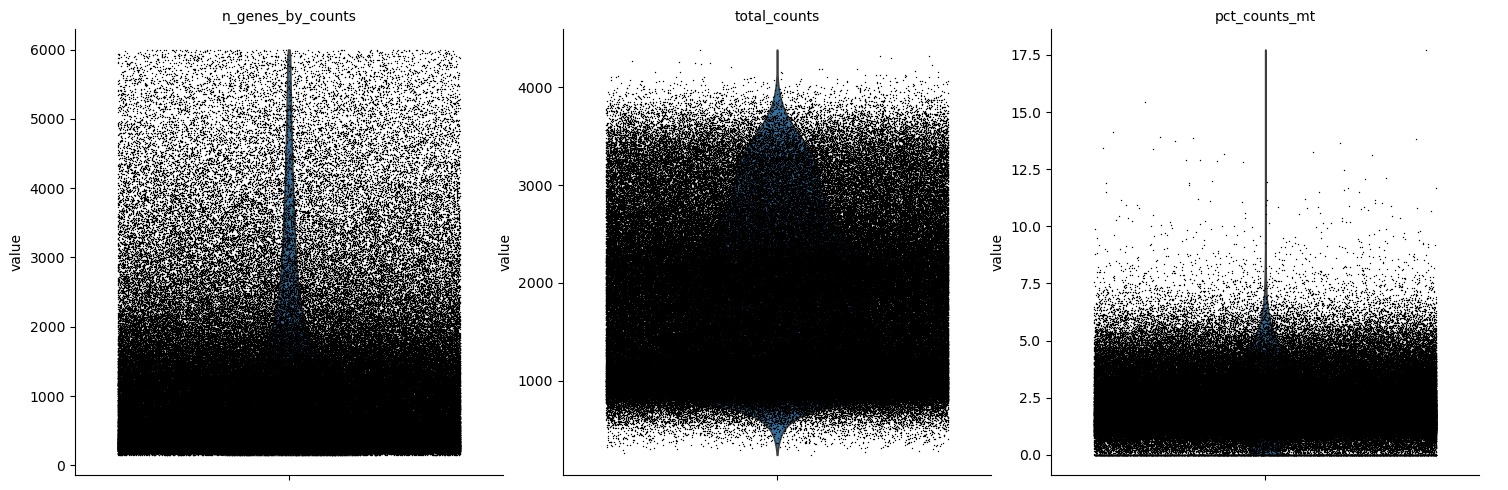

In [14]:
sc.pl.violin(
    franken_et_al_tumor_normalized,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

In [15]:
sc.pp.filter_cells(franken_et_al_tumor_normalized, min_genes=100)
sc.pp.filter_genes(franken_et_al_tumor_normalized, min_cells=3)

In [23]:
franken_et_al_tumor_normalized.obs["patient_id_pre_post"] = franken_et_al_tumor_normalized.obs["Sample"].astype(str) + "_" + franken_et_al_tumor_normalized.obs["pre_post"].astype(str)
franken_et_al_tumor_normalized.obs["patient_id_pre_post"]

Barcode
10X_HEN025_GGAGGTAGTCGACGCT-1_3    10X_HEN025_pre
10X_HEN025_GGAGGTATCATTTGGG-1_3    10X_HEN025_pre
10X_HEN025_GGAGGTATCGAAATCC-1_3    10X_HEN025_pre
10X_HEN025_GGATCTAAGTTGGGAC-1_3    10X_HEN025_pre
10X_HEN025_GGATCTAGTACCTTCC-1_3    10X_HEN025_pre
                                        ...      
10X_HEN019_TTCCCAGTCTGCAGTA-1_2    10X_HEN019_pre
10X_HEN019_TTTCCTCGTTGGTGGA-1_2    10X_HEN019_pre
10X_HEN019_TTTCCTCTCACTCTTA-1_2    10X_HEN019_pre
10X_HEN019_TTTGCGCCACAGGTTT-1_2    10X_HEN019_pre
10X_HEN019_TTTGGTTCAATGTTGC-1_2    10X_HEN019_pre
Name: patient_id_pre_post, Length: 291793, dtype: object

In [24]:
franken_et_al_tumor_normalized.obs["patient_id_pre_post"].unique().tolist()

['10X_HEN025_pre',
 '10X_HEN029_post',
 '10X_HEN040_pre',
 '10X_HEN044_post',
 '10X_HEN008_pre',
 '10X_HEN011_post',
 '10X_HEN054_post',
 '10X_HEN053_pre',
 '10X_HEN061_pre',
 '10X_HEN062_post',
 '10X_HEN074_pre',
 '10X_HEN075_post',
 '10X_HEN004_pre',
 '10X_HEN005_post',
 '10X_HEN079_pre',
 '10X_HEN082_post',
 '10X_HEN033_post',
 '10X_HEN027_pre',
 '10X_HEN078_pre',
 '10X_HEN080_post',
 '10X_HEN009_pre',
 '10X_HEN014_post',
 '10X_HEN066_post',
 '10X_HEN065_pre',
 '10X_HEN026_pre',
 '10X_HEN030_post',
 '10X_HEN057_pre',
 '10X_HEN058_post',
 '10X_HEN071_post',
 '10X_HEN070_pre',
 '10X_HEN048_pre',
 '10X_HEN050_post',
 '10X_HEN041_post',
 '10X_HEN039_pre',
 '10X_HEN023_post',
 '10X_HEN022_pre',
 '10X_HEN028_pre',
 '10X_HEN036_post',
 '10X_HEN019_pre',
 '10X_HEN021_post']

In [25]:
import scanpy.external as scr
scr.pp.scrublet(franken_et_al_tumor_normalized, batch_key="patient_id_pre_post")

/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.49
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 34.6%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.7%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.46
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 26.6%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.5%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.33
Detected doublet rate = 0.7%
Estimated detectable doublet fraction = 41.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.7%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.54
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.6%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 7.4%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.39
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 29.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.8%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.32
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 1.2%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 33.3%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.28
Detected doublet rate = 1.3%
Estimated detectable doublet fraction = 53.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.4%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.25
Detected doublet rate = 0.8%
Estimated detectable doublet fraction = 29.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.7%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.29
Detected doublet rate = 1.2%
Estimated detectable doublet fraction = 43.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.8%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.29
Detected doublet rate = 1.2%
Estimated detectable doublet fraction = 47.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.5%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.53
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 27.5%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.8%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.55
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 16.3%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.4%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.56
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 8.9%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.6%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.37
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 33.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.5%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.39
Detected doublet rate = 0.9%
Estimated detectable doublet fraction = 45.2%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.0%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.58
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 19.3%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.9%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.56
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 13.5%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.4%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.33
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 38.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.8%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.57
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 19.6%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.9%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.34
Detected doublet rate = 1.1%
Estimated detectable doublet fraction = 43.3%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.6%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.52
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 22.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.8%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.34
Detected doublet rate = 1.3%
Estimated detectable doublet fraction = 31.8%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 4.2%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.18
Detected doublet rate = 2.3%
Estimated detectable doublet fraction = 27.5%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 8.4%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.37
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 39.5%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.9%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.69
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.0%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.71
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 10.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.5%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.40
Detected doublet rate = 0.8%
Estimated detectable doublet fraction = 39.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.0%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.46
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 26.6%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.0%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.47
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 34.2%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.2%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.48
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 26.5%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.9%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.70
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 15.8%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.7%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.61
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 21.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.7%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.60
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 30.9%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.3%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.28
Detected doublet rate = 1.1%
Estimated detectable doublet fraction = 39.8%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.8%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.32
Detected doublet rate = 1.3%
Estimated detectable doublet fraction = 41.8%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 3.1%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.38
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 36.2%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.0%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.42
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 47.4%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.0%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.35
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 38.4%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.9%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.42
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 22.6%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.6%


In [29]:
franken_et_al_tumor_normalized_qc = franken_et_al_tumor_normalized[franken_et_al_tumor_normalized.obs['predicted_doublet'] == False]
franken_et_al_tumor_normalized_qc.shape
franken_et_al_tumor_normalized_qc.write_h5ad("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/franken_et_al_tumor_normalized_qc.h5ad")


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initiali

In [16]:
franken_et_al_tumor_normalized_qc = ad.read_h5ad("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/franken_et_al_tumor_normalized_qc.h5ad")

sc.tl.pca(franken_et_al_tumor_normalized_qc)
sc.pp.neighbors(franken_et_al_tumor_normalized_qc)
sc.tl.umap(franken_et_al_tumor_normalized_qc)


In [23]:
franken_et_al_tumor_normalized_qc.obs['pre_post'].unique()

['pre', 'post']
Categories (2, object): ['post', 'pre']

/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


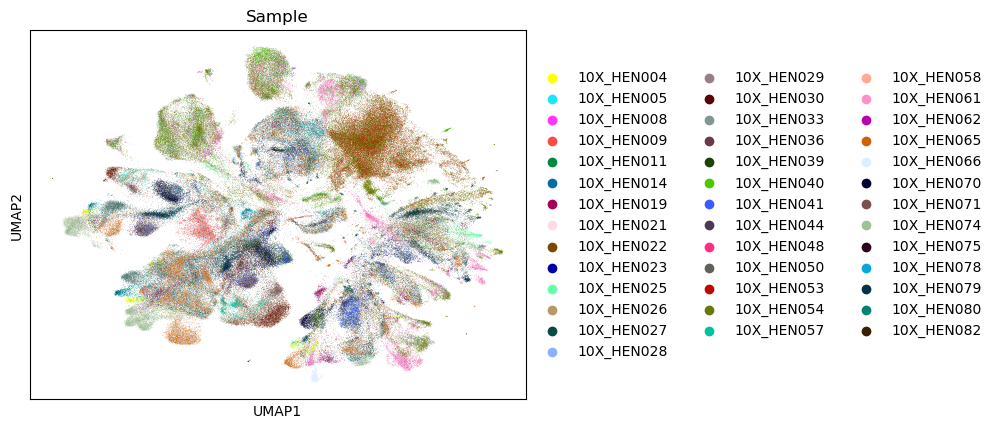

In [22]:
sc.pl.umap(franken_et_al_tumor_normalized_qc, color="Sample")


In [35]:
franken_et_al_tumor_normalized_qc.write_h5ad("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/franken_et_al_tumor_normalized_qc.h5ad")


In [24]:
franken_et_al_tumor_normalized_qc_pre = franken_et_al_tumor_normalized_qc[franken_et_al_tumor_normalized_qc.obs["pre_post"] == "pre"].copy()
franken_et_al_tumor_normalized_qc_pre.shape

# check number of samples for franket al tumor pre

(168734, 31524)

In [25]:
t_cell_clusters = [
    "CD4_Th17",
    "CD8_RM",
    "CD8_EMRA",
    "CD4_N/CM",
    "T_cell",
    "CD4_EM",
    "CD4_Th1",
    "CD8_N/CM",
    "CD8_EX",
    "CD4_FH",
    "CD4_REG",
    "CD8_EM"
]
franken_et_al_tumor_normalized_qc_pre_t_cells = franken_et_al_tumor_normalized_qc_pre[franken_et_al_tumor_normalized_qc_pre.obs["Annotation"].isin(t_cell_clusters)].copy()
franken_et_al_tumor_normalized_qc_pre_t_cells.shape

(50455, 31524)

In [41]:
franken_et_al_tumor_normalized_qc_pre_t_cells.write_h5ad("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/franken_et_al_tumor_normalized_qc_pre_t_cells.h5ad")

In [ ]:
# check number of samples for franket al tumor pre
# Check number of unique samples (barcode_cleaned) for Franken et al tumor pre samples
n_samples_pre = franken_et_al_tumor.obs[franken_et_al_tumor.obs["pre_post"] == "pre"]["barcode_cleaned"].nunique()
print("Number of samples (barcode_cleaned) in tumor pre-treatment:", n_samples_pre)


In [ ]:
# filter all pre post 
franken_et_al_tumor_pre = franken_et_al_tumor[franken_et_al_tumor.obs["pre_post"] == "pre"].copy()
franken_et_al_tumor_post = franken_et_al_tumor[franken_et_al_tumor.obs["pre_post"] == "post"].copy()

# save franken_et_al_tumor_pre and franken_et_al_tumor_post to h5ad
#franken_et_al_tumor_pre.write_h5ad("./franken_et_al_tumor_pre.h5ad")

In [ ]:
#pd.DataFrame(set(franken_et_al_tumor_pre.obs["Annotation"])).to_csv("./franken_et_al_tumor_pre_annotation.csv")
t_cell_clusters = [
    "CD4_Th17",
    "CD8_RM",
    "CD8_EMRA",
    "CD4_N/CM",
    "T_cell",
    "CD4_EM",
    "CD4_Th1",
    "CD8_N/CM",
    "CD8_EX",
    "CD4_FH",
    "CD4_REG",
    "CD8_EM"
]
franken_et_al_tumor_pre_t_cells = franken_et_al_tumor_pre[franken_et_al_tumor_pre.obs["Annotation"].isin(t_cell_clusters)].copy()

# Get number of cells and samples for responders (r) and non-responders (nr) in franken_et_al_tumor_pre_t_cells

# Check unique values for safety
print("Unique Response values in pre_t_cells:", franken_et_al_tumor_pre_t_cells.obs["Response"].unique())

# Number of cells per response group
cell_count = (
    franken_et_al_tumor_pre_t_cells.obs
    .groupby('Response')
    .size()
    .rename('n_cells')
    .reset_index()
)

# Number of samples per response group
sample_count = (
    franken_et_al_tumor_pre_t_cells.obs
    .groupby('Response')['Sample']
    .nunique()
    .rename('n_samples')
    .reset_index()
)

print("Number of cells in pre_t_cells by response (0=nr, 1=r):")
print(cell_count)
print("Number of samples in pre_t_cells by response (0=nr, 1=r):")
print(sample_count)

# Print nice summary
for resp, label in [(1, 'r'), (0, 'nr')]:
    cells = cell_count.loc[cell_count['Response'] == resp, 'n_cells']
    n_cells = int(cells.iloc[0]) if not cells.empty else 0
    samples = sample_count.loc[sample_count['Response'] == resp, 'n_samples']
    n_samples = int(samples.iloc[0]) if not samples.empty else 0
    print(f"{label}: {n_cells} cells, {n_samples} unique samples")



In [ ]:
# save franken_et_al_tumor_pre_t_cells to h5ad
franken_et_al_tumor_pre_t_cells.write_h5ad("./franken_et_al_tumor_pre_t_cells.h5ad")


In [ ]:
# Count unique samples for response and non-response, in pre and post

# Ensure 'Sample' and 'Response' columns exist and are clean
print("Unique Response values:", franken_et_al_tumor.obs["Response"].unique())
print("Unique pre_post values:", franken_et_al_tumor.obs["pre_post"].unique())

# Create a summary table
response_summary = (
    franken_et_al_tumor.obs
    .groupby(['pre_post', 'Response'])['Sample']
    .nunique()
    .rename('n_samples')
    .reset_index()
)

print("Number of unique samples by pre/post and response:")
print(response_summary)

# Convenience: explicitly print for common values
for pre_post in ("pre", "post"):
    for resp in (0, 1):
        n = response_summary[
            (response_summary['pre_post'] == pre_post) & 
            (response_summary['Response'] == resp)
        ]
        num = int(n['n_samples']) if not n.empty else 0
        print(f"{pre_post} | Response={resp}: {num} unique samples")


In [ ]:
franken_et_al_tumor

In [ ]:
# Count number of cells (rows) for each combination of pre_post and Response
cell_count_summary = (
    franken_et_al_tumor.obs
    .groupby(['pre_post', 'Response'])
    .size()
    .rename('n_cells')
    .reset_index()
)

print("Number of cells by pre/post and response:")
print(cell_count_summary)

# For convenience, print common values as before
for pre_post in ("pre", "post"):
    for resp in (0, 1):
        n = cell_count_summary[
            (cell_count_summary['pre_post'] == pre_post) & 
            (cell_count_summary['Response'] == resp)
        ]
        num = int(n['n_cells']) if not n.empty else 0
        print(f"{pre_post} | Response={resp}: {num} cells")


In [ ]:
franken_et_al_tumor_pre = ad.read_h5ad("/Users/z5155527/Desktop/Benchmark-2025-Sep/phase_1_datasets/scRNA-seq/franken_et_al_tumor_pre.h5ad")
franken_et_al_tumor_pre

In [ ]:
# franken uses hg38 
# still need to change the ensembl ids to gene symbols
# This parses gene_id and gene_name from a GFF3 file

gff3_path = '/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/Homo_sapiens.GRCh38.115.gff3'

gene_id_to_symbol = {}

with open(gff3_path, 'r') as gff3_file:
    for line in gff3_file:
        if line.startswith('#'):
            continue
        fields = line.strip().split('\t')
        if len(fields) < 9:
            continue
        if fields[2] != 'gene':
            continue
        attributes_field = fields[8]
        attributes = {}
        for attr in attributes_field.strip().split(';'):
            attr = attr.strip()
            if not attr:
                continue
            if '=' in attr:
                key, value = attr.split('=', 1)
                attributes[key] = value
        # Try GFF3 conventions for gene_id and gene symbol
        gene_id = attributes.get('gene_id', attributes.get('ID', None))
        gene_symbol = attributes.get('gene_name', attributes.get('gene', None))
        if not gene_symbol:
            # Sometimes in GFF3 gene symbol is in Name or gene_name
            gene_symbol = attributes.get('Name', attributes.get('gene_name', None))
        if gene_id and gene_symbol:
            gene_id_to_symbol[gene_id] = gene_symbol

gene_id_symbol_df = pd.DataFrame(list(gene_id_to_symbol.items()), columns=['gene_id_gencode36', 'gene_symbol'])

gene_id_symbol_df.head()


In [ ]:
melanoma_adata_varnames = pd.read_csv('/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/melanoma_adata_protein_coding_final_subset_var_names.csv', index_col=0)
melanoma_adata_varnames

In [ ]:
# Parse gencode.v19.chr_patch_hapl_scaff.annotation.gtf to extract symbol, Ensembl gene ID, and gene type

gtf_file = "./gencode.v19.chr_patch_hapl_scaff.annotation.gtf"

def parse_gtf_attributes(attr_string):
    """Parse the attribute column of a GTF file into a dict."""
    attrs = {}
    for attr in attr_string.strip().split(';'):
        if attr.strip() == '':
            continue
        key_value = attr.strip().split(' ', 1)
        if len(key_value) != 2:
            continue
        key, value = key_value
        attrs[key] = value.strip('"')
    return attrs

gtf_gene_info = []
with open(gtf_file, 'r') as gtf:
    for line in gtf:
        if line.startswith("#"):
            continue
        fields = line.strip().split('\t')
        if len(fields) < 9:
            continue
        feature_type = fields[2]
        if feature_type != "gene":
            continue
        attr_dict = parse_gtf_attributes(fields[8])
        # gene_id (Ensembl), gene_name (symbol), gene_type
        gene_id = attr_dict.get('gene_id')
        gene_name = attr_dict.get('gene_name')
        # GTF files may use "gene_type" or "gene_biotype"
        gene_type = attr_dict.get('gene_type', attr_dict.get('gene_biotype'))
        # Only save if gene_id and gene_name present. gene_type can be None sometimes.
        if gene_id and gene_name:
            gtf_gene_info.append({'gene_id': gene_id, 'gene_name': gene_name, 'gene_type': gene_type})

import pandas as pd
gencode_v19_anno_df = pd.DataFrame(gtf_gene_info)
print("Number of annotated genes in gencode v19:", len(gencode_v19_anno_df))
print(gencode_v19_anno_df.head())


In [ ]:
gencode_v19_anno_df['gene_id_cleaned'] = gencode_v19_anno_df['gene_id'].str.split(".", expand=True)[0]

In [ ]:
melanoma_adata_varnames

In [ ]:
# This code assumes you have variables:
# - melanoma_adata_varnames: listlike of gene symbols for melanoma AnnData (legacy hg19 symbols)
# - franken_adata_varnames: listlike of gene symbols for franken AnnData (hg38 symbols)
# - gencode_v19_anno_df: parsed data frame of gencode v19 (hg19) GTF with columns 'gene_id', 'gene_name', 'gene_id_cleaned'
# - gencode36_anno_df: parsed data frame of Gencode v36 (hg38) GTF or GFF, columns 'gene_id', 'gene_name', 'gene_id_cleaned'

# If not yet loaded, you'll need to parse the gencode v36 gtf/gff first (not shown here).

# 1. Map melanoma_adata_varnames (gene symbols) to gene ids using hg19 (gencode v19 annotations)
mel_symbol_to_id = dict(zip(gencode_v19_anno_df['gene_name'], gencode_v19_anno_df['gene_id_cleaned']))
melanoma_gene_ids = [mel_symbol_to_id.get(symbol) for symbol in melanoma_adata_varnames["Gene"]]

# 2. Map franken_adata_varnames (gene symbols) to gene ids using hg38 (gencode v36 annotations)
franken_symbol_to_id = dict(zip(gene_id_symbol_df['gene_symbol'], gene_id_symbol_df['gene_id_gencode36']))
franken_gene_ids = [franken_symbol_to_id.get(symbol) for symbol in franken_et_al_tumor_pre.var_names.tolist()]

# 3. Get sets of valid mapped gene ids for each dataset
melanoma_gene_id_set = set(x for x in melanoma_gene_ids if x is not None)
franken_gene_id_set = set(x for x in franken_gene_ids if x is not None)

# 4. Compute overlap
overlap_gene_ids = franken_gene_id_set & melanoma_gene_id_set

print(f"Number of mapped melanoma (hg19) genes: {len(melanoma_gene_id_set)}")
print(f"Number of mapped franken (hg38) genes: {len(franken_gene_id_set)}")
print(f"Number of overlapping gene ids: {len(overlap_gene_ids)}")


In [ ]:
overlap_gene_ids

In [ ]:
import scanpy as sc

# Load the melanoma dataset
melanoma_adata = sc.read_h5ad('/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/melanoma_adata_protein_coding_final.h5ad')

# Subset genes (vars) to overlap list
overlap_gene_ids_list = list(overlap_gene_ids)

name_mapping_dict = dict(zip(gencode_v19_anno_df["gene_name"], gencode_v19_anno_df["gene_id_cleaned"]))
melanoma_adata.var.rename(name_mapping_dict, inplace=True)
# Subset melanoma_adata: ensure var index (gene_id) is str
melanoma_adata_subset = melanoma_adata[:, melanoma_adata.var.index.isin(overlap_gene_ids_list)].copy()
print(melanoma_adata_subset.shape)
# Subset franken_et_al_tumor_pre (assumes AnnData with var_names as gencode36 gene_ids)
franken_symbol_to_id = dict(zip(gene_id_symbol_df['gene_symbol'], gene_id_symbol_df['gene_id_gencode36']))
franken_et_al_tumor_pre.var.rename(franken_symbol_to_id, inplace=True)

franken_adata_subset = franken_et_al_tumor_pre[:, franken_et_al_tumor_pre.var_names.isin(overlap_gene_ids_list)].copy()
print(franken_adata_subset.var_names)

name_mapping_dict_back = dict(zip(gencode_v19_anno_df["gene_id_cleaned"], gencode_v19_anno_df["gene_name"]))
melanoma_adata_subset.var.rename(name_mapping_dict_back, inplace=True)
franken_adata_subset.var.rename(name_mapping_dict_back, inplace=True)
print(melanoma_adata_subset.var_names)
print(franken_adata_subset.var_names)

# (optional: sort both by var_names to align order)
melanoma_adata_subset = melanoma_adata_subset[:, sorted(melanoma_adata_subset.var_names)]
franken_adata_subset = franken_adata_subset[:, sorted(franken_adata_subset.var_names)]

# Save to file
melanoma_adata_subset.write_h5ad('melanoma_adata_franken_subset.h5ad')
franken_adata_subset.write_h5ad('franken_et_al_tumor_pre_franken_subset.h5ad')


In [ ]:
franken_adata_subset.obs['Annotation'].unique().tolist()

In [ ]:
print(melanoma_adata_subset.shape)
print(franken_adata_subset.shape)

In [ ]:
franken_adata_subset


In [ ]:
import anndata as ad
import scanpy as sc
import pandas as pd
franken_et_al_all = ad.read_h5ad("/Users/z5155527/Desktop/Benchmark-2025-Sep/phase_1_datasets/scRNA-seq/franken_et_al_all.h5ad")
franken_et_al_all

franken_et_al_all.obs['Annotation'].unique().tolist()




In [ ]:
franken_et_al_all.obs.columns

In [ ]:
franken_et_al_all.obs['Tissue'].unique().tolist()

In [ ]:
franken_et_al_all

In [ ]:
franken_et_al_all_normalized = franken_et_al_all.copy()
franken_et_al_all_normalized.layers['counts'] = franken_et_al_all_normalized.X.copy()
franken_et_al_all_normalized.raw = franken_et_al_all_normalized
sc.pp.normalize_total(franken_et_al_all_normalized, target_sum=1e4) # Normalize to 10,000 counts per cell
sc.pp.log1p(franken_et_al_all_normalized) # Log-transform the data

In [ ]:
franken_et_al_all_normalized.write_h5ad("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/franken_et_al_all_normalized.h5ad")

In [ ]:
franken_et_al_all_normalized_pre = franken_et_al_all_normalized[franken_et_al_all_normalized.obs["Tissue"] == "Tumor pre-treatment"].copy()

In [ ]:
t_cell_clusters = [
    "CD4_Th17",
    "CD8_RM",
    "CD8_EMRA",
    "CD4_N/CM",
    "T_cell",
    "CD4_EM",
    "CD4_Th1",
    "CD8_N/CM",
    "CD8_EX",
    "CD4_FH",
    "CD4_REG",
    "CD8_EM"
]
franken_et_al_all_normalized_pre_t_cells = franken_et_al_all_normalized_pre[franken_et_al_all_normalized_pre.obs["Annotation"].isin(t_cell_clusters)].copy()
print(franken_et_al_all_normalized_pre_t_cells.obs["Sample"].unique().tolist())

In [ ]:
print(len(franken_et_al_all_normalized_pre_t_cells.obs["Sample"].unique().tolist()))

In [ ]:
franken_et_al_tumor_pre_t_cells.X

In [ ]:
franken_et_al_all_normalized_pre_t_cells.write_h5ad("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/franken_et_al_all_normalized_pre_t_cells.h5ad")

In [23]:
import anndata as ad
import scanpy as sc
import pandas as pd
franken_et_al_all_normalized_pre_t_cells = ad.read_h5ad("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/franken_et_al_all_normalized_pre_t_cells.h5ad")
franken_et_al_all_normalized_pre_t_cells.shape


(50575, 37977)

In [7]:
import pandas as pd

# Calculate mean value for each gene across all cells
# Calculate mean value for each gene grouped by 'Sample'
import numpy as np
import pandas as pd

sample_means = []
sample_names = []

for sample in franken_et_al_all_normalized_pre_t_cells.obs['Sample'].unique():
    idx = franken_et_al_all_normalized_pre_t_cells.obs['Sample'] == sample
    sub = franken_et_al_all_normalized_pre_t_cells[idx]
    # handle sparse matrices if necessary
    X = sub.X
    mean = np.asarray(X.mean(axis=0)).ravel()
    sample_means.append(mean)
    sample_names.append(sample)

gene_means_by_sample = pd.DataFrame(
    sample_means,
    columns=franken_et_al_all_normalized_pre_t_cells.var_names,
    index=sample_names
)

gene_means_by_sample




,MIR1302-2HG,FAM138A,OR4F5,AL627309.1,AL627309.3,AL627309.2,AL627309.4,FO538757.3,FO538757.2,AP006222.2,...,FAM197Y7,FAM197Y6,AC244213.1,AC011751.1,AC007244.1,AC010889.2,AC009494.2,AC010086.3,AC024236.1,PRYP3
10X_HEN025,0.000000,0.0,0.0,0.001483,0.000389,0.0,0.00019,0.000000,0.036234,0.010212,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
10X_HEN040,0.000000,0.0,0.0,0.000632,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
10X_HEN008,0.000000,0.0,0.0,0.003285,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
10X_HEN053,0.000000,0.0,0.0,0.001501,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
10X_HEN061,0.000000,0.0,0.0,0.000616,0.000086,0.0,0.00000,0.000222,0.046906,0.006208,...,0.0,0.0,0.006306,0.000067,0.000382,0.001523,0.0,0.0,0.0,0.0
10X_HEN074,0.000000,0.0,0.0,0.000358,0.000112,0.0,0.00000,0.000246,0.100426,0.009367,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
10X_HEN004,0.000000,0.0,0.0,0.001598,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
10X_HEN079,0.000000,0.0,0.0,0.000944,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
10X_HEN027,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
10X_HEN078,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [8]:
gene_means_by_sample = gene_means_by_sample.T
gene_means_by_sample['Gene'] = gene_means_by_sample.index

In [22]:
# CCR7
gene_means_by_sample[gene_means_by_sample['Gene'] == 'LGALS1']

,10X_HEN025,10X_HEN040,10X_HEN008,10X_HEN053,10X_HEN061,10X_HEN074,10X_HEN004,10X_HEN079,10X_HEN027,10X_HEN078,...,10X_HEN065,10X_HEN026,10X_HEN057,10X_HEN070,10X_HEN048,10X_HEN039,10X_HEN022,10X_HEN028,10X_HEN019,Gene
LGALS1,1.30162,0.733376,0.972471,1.927177,2.016179,1.0749,0.986046,1.105565,1.679338,1.625577,...,1.170549,0.599941,0.827031,0.803462,0.66287,1.073832,0.247737,0.587174,1.954931,LGALS1


In [28]:
gene_means_by_sample

,10X_HEN025,10X_HEN040,10X_HEN008,10X_HEN053,10X_HEN061,10X_HEN074,10X_HEN004,10X_HEN079,10X_HEN027,10X_HEN078,...,10X_HEN065,10X_HEN026,10X_HEN057,10X_HEN070,10X_HEN048,10X_HEN039,10X_HEN022,10X_HEN028,10X_HEN019,Gene
Gene,,,,,,,,,,,,,,,,,,,,,
MIR1302-2HG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000231,0.000000,0.0,0.000000,0.0,0.000000,0.000,0.0,0.00000,MIR1302-2HG
FAM138A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000,0.0,0.00000,FAM138A
OR4F5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000,0.0,0.00000,OR4F5
AL627309.1,0.001483,0.000632,0.003285,0.001501,0.000616,0.000358,0.001598,0.000944,0.0,0.0,...,0.000730,0.000583,0.0,0.001525,0.0,0.000000,0.003,0.0,0.00269,AL627309.1
AL627309.3,0.000389,0.000000,0.000000,0.000000,0.000086,0.000112,0.000000,0.000000,0.0,0.0,...,0.000250,0.000000,0.0,0.000000,0.0,0.000000,0.000,0.0,0.00000,AL627309.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC010889.2,0.000000,0.000000,0.000000,0.000000,0.001523,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000375,0.0,0.001694,0.0,0.002651,0.000,0.0,0.00000,AC010889.2
AC009494.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000,0.0,0.00000,AC009494.2
AC010086.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000,0.0,0.00000,AC010086.3


In [23]:
gene_means_by_sample.index = gene_means_by_sample['Gene']

In [29]:
# add response information 
franken_et_al_all_normalized_pre_t_cells_sample_response = franken_et_al_all_normalized_pre_t_cells.obs[['Sample', 'Response']]

# Map the sample response info to columns in gene_means_by_sample.
# Each column (except 'Gene') is a sample. Add a new row at the end for 'Response' using the mapping.
response_series = franken_et_al_all_normalized_pre_t_cells_sample_response.drop_duplicates().set_index('Sample')['Response']
# Get sample columns (exclude 'Gene')
sample_columns = [col for col in gene_means_by_sample.columns if col != 'Gene']
# Values in the same order as columns
response_row = [response_series.get(col, None) for col in sample_columns] + ['Responder']
# Append the row
gene_means_by_sample.loc['Responder'] = response_row


In [43]:
gene_means_by_sample

,10X_HEN025,10X_HEN040,10X_HEN008,10X_HEN053,10X_HEN061,10X_HEN074,10X_HEN004,10X_HEN079,10X_HEN027,10X_HEN078,10X_HEN009,10X_HEN065,10X_HEN026,10X_HEN057,10X_HEN070,10X_HEN048,10X_HEN039,10X_HEN022,10X_HEN028,10X_HEN019
Gene,,,,,,,,,,,,,,,,,,,,
MIR1302-2HG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000231,0.000000,0.0,0.000000,0.0,0.0,0.000,0.0,0.00000
FAM138A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000,0.0,0.00000
OR4F5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000,0.0,0.00000
AL627309.1,0.001483,0.000632,0.003285,0.001501,0.000616,0.000358,0.001598,0.000944,0.0,0.0,0.002211,0.000730,0.000583,0.0,0.001525,0.0,0.0,0.003,0.0,0.00269
AL627309.3,0.000389,0.000000,0.000000,0.000000,0.000086,0.000112,0.000000,0.000000,0.0,0.0,0.000848,0.000250,0.000000,0.0,0.000000,0.0,0.0,0.000,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC009494.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000,0.0,0.00000
AC010086.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000,0.0,0.00000
AC024236.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000,0.0,0.00000


In [ ]:
protein_coding_genes = pd.read_csv("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/protein_coding_reference.csv")

In [41]:
protein_coding_genes

,Unnamed: 0,x
0,1,A1BG
1,2,A2M
2,3,NAT1
3,4,NAT2
4,5,SERPINA3
...,...,...
20629,20630,ND1
20630,20631,ND5
20631,20632,ATP8
20632,20633,ND2


In [50]:
# Filter gene_means_by_sample to include only protein-coding genes
protein_coding_gene_set = set(protein_coding_genes['x'])
gene_means_by_sample_pc = gene_means_by_sample[gene_means_by_sample.index.isin(protein_coding_gene_set)]
gene_means_by_sample_pc = pd.concat([gene_means_by_sample_pc,gene_means_by_sample[gene_means_by_sample.index == 'Responder']])

In [51]:
gene_means_by_sample_pc.shape

(18777, 20)

In [52]:
gene_means_by_sample_pc.to_csv("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/gene_means_by_sample_franken_et_al_pc.csv")

In [37]:
gene_means_by_sample.to_csv("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/gene_means_by_sample_franken_et_al.csv")

In [5]:
import pandas as pd
gene_means_by_sample = pd.read_csv("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/gene_means_by_sample_franken_et_al_pc.csv", index_col=0)

In [7]:
gene_means_by_sample

,10X_HEN025,10X_HEN040,10X_HEN008,10X_HEN053,10X_HEN061,10X_HEN074,10X_HEN004,10X_HEN079,10X_HEN027,10X_HEN078,10X_HEN009,10X_HEN065,10X_HEN026,10X_HEN057,10X_HEN070,10X_HEN048,10X_HEN039,10X_HEN022,10X_HEN028,10X_HEN019
Gene,,,,,,,,,,,,,,,,,,,,
OR4F5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OR4F29,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OR4F16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SAMD11,0.002956,0.001158,0.006662,0.003453,0.017098,0.005742,0.002269,0.002012,0.000677,0.002125,0.000694,0.005861,0.005557,0.000734,0.001443,0.000000,0.000000,0.000000,0.000000,0.009507
NOC2L,0.148778,0.092413,0.113623,0.050995,0.155875,0.151068,0.137675,0.125298,0.151687,0.119232,0.099032,0.159224,0.159534,0.167260,0.120828,0.024114,0.095313,0.098265,0.099803,0.139775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OR51C1P,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DERPC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020453,0.011733,0.013769,0.000000,0.013731,0.000000,0.000000,0.000000
FOXO3B,0.000000,0.000000,0.000000,0.000000,0.003028,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007749,0.008813,0.003789,0.000000,0.001674,0.000000,0.000000,0.000000


In [35]:
gene_means_by_sample.drop(columns=['Gene'], inplace=True)

In [36]:
gene_means_by_sample

,10X_HEN025,10X_HEN040,10X_HEN008,10X_HEN053,10X_HEN061,10X_HEN074,10X_HEN004,10X_HEN079,10X_HEN027,10X_HEN078,10X_HEN009,10X_HEN065,10X_HEN026,10X_HEN057,10X_HEN070,10X_HEN048,10X_HEN039,10X_HEN022,10X_HEN028,10X_HEN019
Gene,,,,,,,,,,,,,,,,,,,,
MIR1302-2HG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000231,0.000000,0.0,0.000000,0.0,0.0,0.000,0.0,0.00000
FAM138A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000,0.0,0.00000
OR4F5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000,0.0,0.00000
AL627309.1,0.001483,0.000632,0.003285,0.001501,0.000616,0.000358,0.001598,0.000944,0.0,0.0,0.002211,0.000730,0.000583,0.0,0.001525,0.0,0.0,0.003,0.0,0.00269
AL627309.3,0.000389,0.000000,0.000000,0.000000,0.000086,0.000112,0.000000,0.000000,0.0,0.0,0.000848,0.000250,0.000000,0.0,0.000000,0.0,0.0,0.000,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC009494.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000,0.0,0.00000
AC010086.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000,0.0,0.00000
AC024236.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000,0.0,0.00000


In [ ]:
import pandas as pd

means_with_response_franken_et_al_pc = pd.read_csv('/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/gene_importance_franken_round2.csv')
means_with_response_franken_et_al_pc.shape


# Load gene importance scores
gene_importance = pd.read_csv('./gene_importance_franken_round1.csv')
#gene_importance.drop(columns=['Unnamed: 0'], inplace=True)
gene_importance.rename(columns={'0': 'importance'}, inplace=True)

# Make sure the file has a column with scores and gene names. Assume columns: 'gene' and 'importance'

top_genes = gene_importance.sort_values(by='importance', ascending=False).head(1000)
print(top_genes)
# Load the means_with_response data
means_with_response = means_with_response_franken_et_al_pc.copy()
means_with_response.rename(columns={'Unnamed: 0': 'Gene'}, inplace=True)
means_with_response.index = means_with_response['Gene']
means_with_response.drop(columns=['Gene'], inplace=True)
# Subset to only rows (or columns) for the top 75% genes
# Typically, genes are columns except maybe the first column is an index/sample.
# We'll check if gene names are in rows or columns. We'll assume genes are columns.

#genes_in_means = [g for g in means_with_response.columns if g in set(top_genes)]
# Optionally keep the index/sample columns too (if any)
#non_gene_columns = [c for c in means_with_response.columns if c not in gene_importance['genes'].values]
subset_means = means_with_response.loc[top_genes['genes'],:]

# If you need to save the result to a file:
# subset_means.to_csv('code/means_with_response_gondal_t_cells_top75.csv', index=False)


       Unnamed: 0  importance   genes
15230       15230    0.001663   RPL19
7576         7576    0.001509    SAT1
16680       16680    0.000996   RPS15
5489         5489    0.000971   RPS14
297           297    0.000813   RPL11
...           ...         ...     ...
393           393    0.000046  YTHDF2
2999         2999    0.000046   SP110
5801         5801    0.000046  BTN2A1
12037       12037    0.000046   MMP19
8726         8726    0.000046  CTHRC1

[1000 rows x 3 columns]


In [6]:
subset_means

,10X_HEN025,10X_HEN040,10X_HEN008,10X_HEN053,10X_HEN061,10X_HEN074,10X_HEN004,10X_HEN079,10X_HEN027,10X_HEN078,10X_HEN009,10X_HEN065,10X_HEN026,10X_HEN057,10X_HEN070,10X_HEN048,10X_HEN039,10X_HEN022,10X_HEN028,10X_HEN019
Gene,,,,,,,,,,,,,,,,,,,,
OR4F5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OR4F29,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OR4F16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SAMD11,0.002956,0.001158,0.006662,0.003453,0.017098,0.005742,0.002269,0.002012,0.000677,0.002125,0.000694,0.005861,0.005557,0.000734,0.001443,0.000000,0.000000,0.000000,0.000000,0.009507
NOC2L,0.148778,0.092413,0.113623,0.050995,0.155875,0.151068,0.137675,0.125298,0.151687,0.119232,0.099032,0.159224,0.159534,0.167260,0.120828,0.024114,0.095313,0.098265,0.099803,0.139775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SPDYE17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OR51C1P,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DERPC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020453,0.011733,0.013769,0.000000,0.013731,0.000000,0.000000,0.000000


In [ ]:
# Add the 'Responder' row from means_with_response to the end of subset_means
means_with_response_franken_et_al_pc.index = means_with_response_franken_et_al_pc['Gene']
means_with_response_franken_et_al_pc.drop(columns=['Gene'], inplace=True)
subset_means_with_responder = pd.concat([subset_means, means_with_response_franken_et_al_pc.loc[['Responder'], :]], axis=0)
print(subset_means_with_responder)
subset_means_with_responder.to_csv('/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/means_with_response_franken_et_al_top_1000.csv')


           10X_HEN025  10X_HEN040  10X_HEN008  10X_HEN053  10X_HEN061  \
Gene                                                                    
RPL19        3.105799    2.256291    2.128152    2.053451    2.556577   
SAT1         2.153070    2.929143    2.524018    2.962752    2.047128   
RPS15        2.900300    2.094284    2.137697    1.900990    2.455093   
RPS14        2.966110    2.208524    2.191190    2.185669    2.599898   
RPL11        2.828716    2.140051    2.144106    2.097319    2.666096   
...               ...         ...         ...         ...         ...   
SP110        0.368118    0.528034    0.655101    0.237253    0.341976   
BTN2A1       0.066958    0.123095    0.141233    0.047781    0.105468   
MMP19        0.058619    0.058239    0.052406    0.263347    0.104532   
CTHRC1       0.165979    0.117229    0.175507    0.200524    0.566635   
Responder    1.000000    0.000000    0.000000    1.000000    0.000000   

           10X_HEN074  10X_HEN004  10X_HEN079  10X

In [21]:
import pandas as pd

means_with_response_franken_et_al_top_1000 = pd.read_csv('/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/means_with_response_franken_et_al_top_1000.csv')
means_with_response_franken_et_al_top_1000.shape


# Load gene importance scores
gene_importance = pd.read_csv('./gene_importance_franken_round2.csv')
#gene_importance.drop(columns=['Unnamed: 0'], inplace=True)
gene_importance.rename(columns={'0': 'importance'}, inplace=True)

# Make sure the file has a column with scores and gene names. Assume columns: 'gene' and 'importance'
top_75pct_cutoff = gene_importance['importance'].quantile(0.25)  # top 60% = remove bottom 40%

top_genes = gene_importance[gene_importance['importance'] > top_75pct_cutoff]['genes']

# Load the means_with_response data
means_with_response = means_with_response_franken_et_al_top_1000.copy()
means_with_response.rename(columns={'Unnamed: 0': 'Gene'}, inplace=True)
means_with_response.index = means_with_response['Gene']
means_with_response.drop(columns=['Gene'], inplace=True)
# Subset to only rows (or columns) for the top 75% genes
# Typically, genes are columns except maybe the first column is an index/sample.
# We'll check if gene names are in rows or columns. We'll assume genes are columns.

#genes_in_means = [g for g in means_with_response.columns if g in set(top_genes)]
# Optionally keep the index/sample columns too (if any)
#non_gene_columns = [c for c in means_with_response.columns if c not in gene_importance['genes'].values]
subset_means = means_with_response.loc[top_genes,:]

# If you need to save the result to a file:
# subset_means.to_csv('code/means_with_response_gondal_t_cells_top75.csv', index=False)


In [22]:
# Add the 'Responder' row from means_with_response to the end of subset_means
means_with_response_franken_et_al_top_1000.index = means_with_response_franken_et_al_top_1000['Gene']
means_with_response_franken_et_al_top_1000.drop(columns=['Gene'], inplace=True)
subset_means_with_responder = pd.concat([subset_means, means_with_response_franken_et_al_top_1000.loc[['Responder'], :]], axis=0)
print(subset_means_with_responder)
subset_means_with_responder.to_csv('/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/means_with_response_franken_et_al_top_750.csv')


           10X_HEN025  10X_HEN040  10X_HEN008  10X_HEN053  10X_HEN061  \
Gene                                                                    
RPS15        2.900300    2.094284    2.137697    1.900990    2.455093   
RPS14        2.966110    2.208524    2.191190    2.185669    2.599898   
NAMPT        1.059484    2.131245    1.657177    1.962313    0.980803   
EEF1A1       3.210122    2.641430    2.638624    3.075394    3.262126   
TSC22D3      0.927896    1.489468    1.182546    1.206665    0.567280   
...               ...         ...         ...         ...         ...   
SP110        0.368118    0.528034    0.655101    0.237253    0.341976   
BTN2A1       0.066958    0.123095    0.141233    0.047781    0.105468   
MMP19        0.058619    0.058239    0.052406    0.263347    0.104532   
CTHRC1       0.165979    0.117229    0.175507    0.200524    0.566635   
Responder    1.000000    0.000000    0.000000    1.000000    0.000000   

           10X_HEN074  10X_HEN004  10X_HEN079  10X